# Valorant Data Analysis

Hello gamers and viewers!!! 

In my final project for the Python class I decided to do a data analysis/visualization about my favorite video game at the moment, Valorant.
Initially I looked at a few websites like blitz, dak and tracker to get my data but ultimately decided to scrape my Valorant player data from https://tracker.gg/valorant. This is one of the few websites which has access to the official Riot API, Riot is the company that developed and owns the game, so the data is very accurate. I wanted to see if we can build a model that predicts the win percentage of a player based on information we get from the website. This is a tactical shooter game where aim, strategy, ability usage and co-operation with teammates are key to achieve victory. 

Research Question: How relevant are statistics like Wins, Kills, Headshots, Deaths, Assists, Score/Round, Kills/Round, First Bloods, Aces, Clutches, Flawless, Most Kills (Match), Damage/Round, K/D Ratio, Headshot% in predicting the win percentage of a player in the video game Valorant?

Let's go over the data scraper I constructed and how that works!
Main idea behind it:
1. Get usernames from leaderboard (I got the top 5000+ players)
2. Get stat data for each username (player)
3. Compile and concatenate the data in a big dataframe



In [28]:
# Imports used for data manipulation
import numpy as np
import pandas as pd

# Imports used for graphing and plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Imports used for data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

%matplotlib inline

In [29]:
#Read CSVs that we got from our web scrapper
data_1_5 = pd.read_csv('./data/Valorant_Data_1_5.csv', index_col=0).transpose()
data_6_10 = pd.read_csv('./data/Valorant_Data_6_10.csv', index_col=0).transpose()
data_11_15 = pd.read_csv('./data/Valorant_Data_11_15.csv', index_col=0).transpose()
data_16_20 = pd.read_csv('./data/Valorant_Data_16_20.csv', index_col=0).transpose()
data_21_25 = pd.read_csv('./data/Valorant_Data_21_25.csv', index_col=0).transpose()
data_26_30 = pd.read_csv('./data/Valorant_Data_26_30.csv', index_col=0).transpose()
data_31_35 = pd.read_csv('./data/Valorant_Data_31_35.csv', index_col=0).transpose()
data_36_40 = pd.read_csv('./data/Valorant_Data_36_40.csv', index_col=0).transpose()
data_41_45 = pd.read_csv('./data/Valorant_Data_41_45.csv', index_col=0).transpose()
data_46_50 = pd.read_csv('./data/Valorant_Data_46_50.csv', index_col=0).transpose()
data_51_55 = pd.read_csv('./data/Valorant_Data_51_55.csv', index_col=0).transpose()
data_56_60 = pd.read_csv('./data/Valorant_Data_56_60.csv', index_col=0).transpose()

# Combine to single dataframe
val_data = pd.concat([data_1_5, data_6_10, data_11_15, data_16_20, data_21_25, data_26_30, data_31_35, data_36_40, data_41_45, data_46_50, data_51_55, data_56_60])

In [30]:
# Clean up the Rank data
index = 0
for string in val_data['Rank']:
    if string == 'KAD Ratio':
        val_data['Rank'][index] = 'Radiant'
    index +=1

In [31]:
# Large dataframe with (5492 rows x 20 columns)
val_data


,Rank,Matches,Wins,Kills,Headshots,Deaths,Assists,Score/Round,Kills/Round,First Bloods,Aces,Clutches,Flawless,Most Kills (Match),Damage/Round,K/D Ratio,Headshot%,Win %,Top Agent,Top Weapon
100T Ethan#FARM,Radiant,186,119,3740,2336,2565,1269,271.2,0.9,433,10,228,179,50,177.4,1.46,23.1,64.0,Sova,Vandal
zt0L#TTV,Radiant,202,118,3259,1722,2956,1417,217.9,0.8,327,5,301,158,31,141.7,1.10,17.2,58.4,Sova,Vandal
XSET Cryo#cells,Radiant,297,181,6348,3551,4610,735,280.2,1.0,1320,15,417,307,42,175.2,1.38,29.9,60.9,Jett,Vandal
GHOST koalanoob#miku,Radiant,213,125,4519,2588,3400,845,281.0,1.0,874,15,361,214,42,178.1,1.33,25.7,58.7,Jett,Vandal
ZexRow#NA2,Radiant,211,112,3612,2317,3307,990,225.3,0.8,550,9,285,156,44,146.1,1.09,24.2,53.1,Jett,Vandal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fray#CA1,Immortal 2,164,82,2694,1815,2573,782,218.2,0.8,317,6,241,140,29,145.7,1.05,26.4,50.0,Sova,Vandal
Evil#Liv3,Immortal 2,104,62,1765,1113,1611,420,226.5,0.8,300,3,159,109,32,149.4,1.10,23.2,59.6,Jett,Vandal
Dexter#6900,Immortal 2,181,88,3216,2148,2690,742,240.6,0.8,436,6,265,160,33,156.9,1.20,26.4,48.6,Jett,Vandal
YOU CANT SEE ME#FLASH,Immortal 2,192,99,3093,1872,3031,819,223.0,0.8,561,7,305,167,36,145.9,1.02,21.6,51.6,Neon,Phantom


## Initial Analysis/Visualization

In this section I wanted to plot some bar graphs in order to see the top agents and weapons in the game.

Text(0.5, 1.0, 'Count of Players in Each Rank')

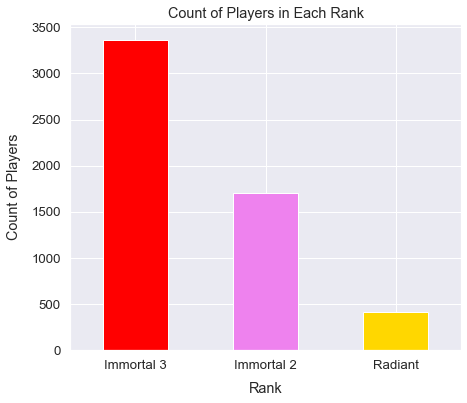

In [32]:
# Rank
# First off we check to see if we got the right ranks from our API and we see how many players we got in each rank
sns.set(font_scale=1.2)
val_data['Rank'].value_counts().plot(kind='bar',figsize=(7, 6), rot=0, color = ['red', 'violet', 'gold'])
plt.xlabel("Rank", labelpad=10)
plt.ylabel("Count of Players",labelpad=10)
plt.title("Count of Players in Each Rank")

Text(0.5, 1.0, 'Most Picked Agent')

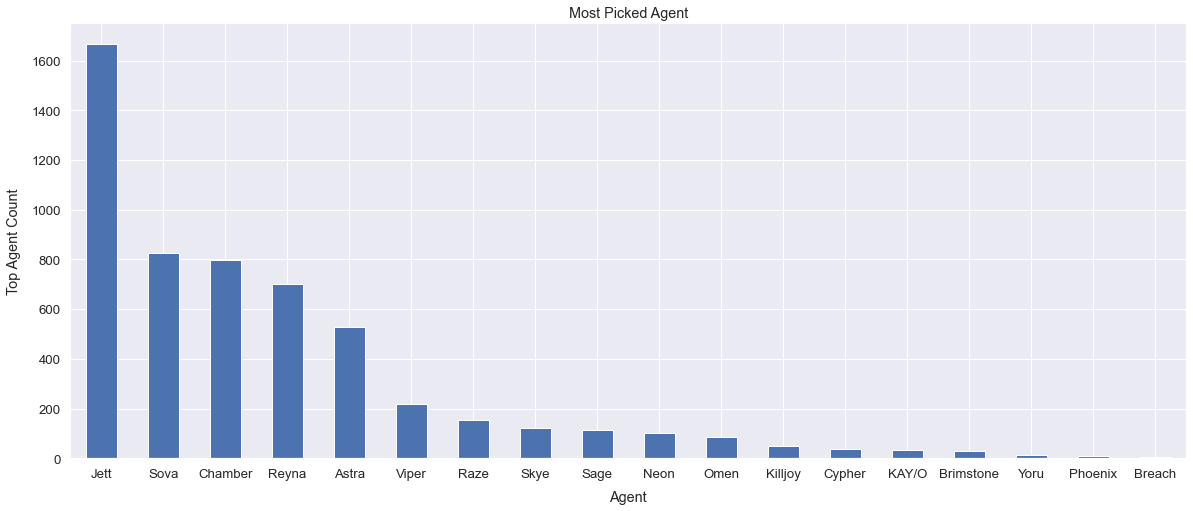

In [33]:
# Most Played Agents
sns.set(font_scale=1.2)
val_data['Top Agent'].value_counts().plot(kind='bar',figsize=(20, 8), rot = 0)
plt.xlabel("Agent", labelpad=10)
plt.ylabel("Top Agent Count",labelpad=10)
plt.title("Most Picked Agent")

This is one of the coolest graphs in my opinion because we see the most frequent agents played by the best players in the world. In this ACT we see Jett, Sova, Chamber, Reyna and Astra are the top 5 most played agents. It is interesting to see that the agents who dominate the ranked queue also dominate the professional scene. Jett is the most popular agent in and out of the game as she has a versitale kit which makes her a really fun character to play.

Text(0.5, 1.0, 'Most Used Weapons')

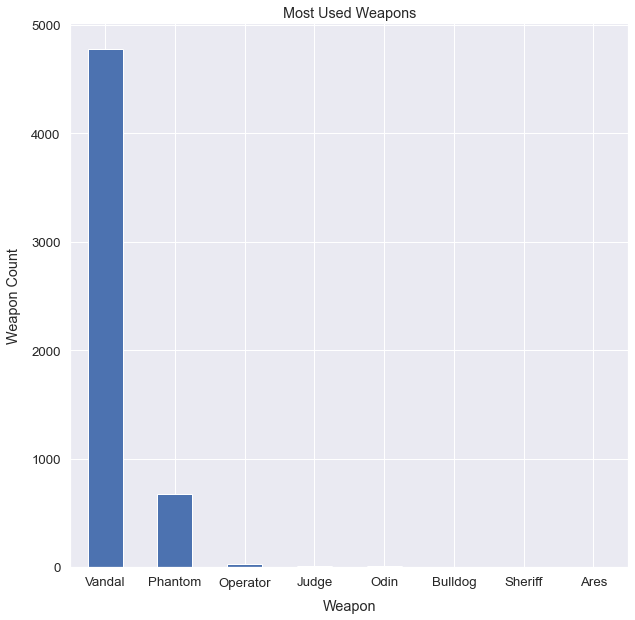

In [34]:
# Most Used Weapon
sns.set(font_scale=1.2)
val_data['Top Weapon'].value_counts().plot(kind='bar',figsize=(10, 10), rot=0)
plt.xlabel("Weapon", labelpad=10)
plt.ylabel("Weapon Count",labelpad=10)
plt.title("Most Used Weapons")

This graph is also interesting as it shows that the Vandal is by far the most used weapon in top tier Valorant. I believe this is the case because this weapon is a high risk high reward gun where if you get a headshot you instantly kill your adversary, however, it is harder to control in close range fights. Players in such high rank have incredible aim which makes them use this gun to make crazy plays.

## Correlation and Data Normalization

In this section we will see how correlated our stats are to the win percantage column and we will normalize our data, which simply means each input in the dataframe will be between 0 and 1 to facilitate the modeling of the data.

In [35]:
# Take away the string information that we already used to do some analysis
ranks = val_data.pop('Rank')
agents = val_data.pop('Top Agent')
weapon = val_data.pop('Top Weapon')


In [36]:
# Now that we only have numerical values in the dataframe, we need them to be floats and not string 
val_data = val_data.astype(float)

In [37]:
# The correlation between our column and Win %
val_data.corr(method ='kendall')['Win %']

Matches              -0.214623
Wins                 -0.111673
Kills                -0.199781
Headshots            -0.184142
Deaths               -0.227323
Assists              -0.184487
Score/Round           0.089009
Kills/Round           0.100026
First Bloods         -0.159889
Aces                 -0.082483
Clutches             -0.188080
Flawless             -0.158001
Most Kills (Match)   -0.040135
Damage/Round          0.119668
K/D Ratio             0.186536
Headshot%            -0.019496
Win %                 1.000000
Name: Win %, dtype: float64

We want to find the correlation between our other columns and the Win % column, because we know our y value, the thing we want to predict, will be Win %, however, we need to find our x values which are the variables we will use to predict the win percentage. We can see from the results above that each column has somewhat an effect on the win percantage and since none have a leap over the others by a big margin, then, I decided to use all of them for our model. In a way, this makes sense because each of these variables would affect your chance of winning.

In [39]:
# Normalize our data using min-max normalization
normalized_val_data=(val_data-val_data.min())/(val_data.max()-val_data.min())
normalized_val_data  

,Matches,Wins,Kills,Headshots,Deaths,Assists,Score/Round,Kills/Round,First Bloods,Aces,Clutches,Flawless,Most Kills (Match),Damage/Round,K/D Ratio,Headshot%,Win %
100T Ethan#FARM,0.245007,0.310345,0.275913,0.271881,0.207373,0.341075,0.014295,0.014245,0.154259,0.294118,0.185668,0.281005,0.84,0.793026,0.554140,0.460159,0.620653
zt0L#TTV,0.266312,0.307692,0.240352,0.200419,0.239120,0.381042,0.009263,0.011396,0.116321,0.147059,0.245114,0.248038,0.46,0.633438,0.324841,0.342629,0.561644
XSET Cryo#cells,0.392810,0.474801,0.468727,0.413291,0.373417,0.196867,0.015145,0.017094,0.471725,0.441176,0.339577,0.481947,0.68,0.783192,0.503185,0.595618,0.587987
GHOST koalanoob#miku,0.280959,0.326260,0.333506,0.301210,0.275171,0.226573,0.015221,0.017094,0.312097,0.441176,0.293974,0.335950,0.68,0.796156,0.471338,0.511952,0.564805
ZexRow#NA2,0.278296,0.291777,0.266450,0.269669,0.267619,0.265730,0.009961,0.011396,0.196135,0.264706,0.232085,0.244898,0.72,0.653107,0.318471,0.482072,0.505796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fray#CA1,0.215712,0.212202,0.198581,0.211243,0.208022,0.209560,0.009291,0.011396,0.112742,0.176471,0.196254,0.219780,0.42,0.651319,0.292994,0.525896,0.473130
Evil#Liv3,0.135819,0.159151,0.129898,0.129539,0.129912,0.111801,0.010075,0.011396,0.106657,0.088235,0.129479,0.171115,0.48,0.667859,0.324841,0.462151,0.574289
Dexter#6900,0.238349,0.228117,0.237173,0.250000,0.217522,0.198758,0.011406,0.011396,0.155333,0.176471,0.215798,0.251177,0.50,0.701386,0.388535,0.525896,0.458377
YOU CANT SEE ME#FLASH,0.252996,0.257294,0.228079,0.217877,0.245209,0.219552,0.009744,0.011396,0.200072,0.205882,0.248371,0.262166,0.56,0.652213,0.273885,0.430279,0.489989


Here is our normalized dataframe where every input in it is a float between 0 and 1.

## Data Visualization

In this section we visualize some of our column attributes against Win percentage in order to observe if they have a linear relationship or not. We observe that for the most part they are indeed correlated linear relationships. 

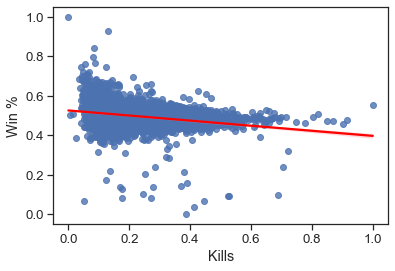

In [40]:
# Kills
sns.set(font_scale=1.2)
sns.set_style('ticks')
sns.regplot( x = normalized_val_data['Kills'],  y = normalized_val_data['Win %'], line_kws={"color": "red"})
sns.set(rc={'figure.figsize':(12,5)})


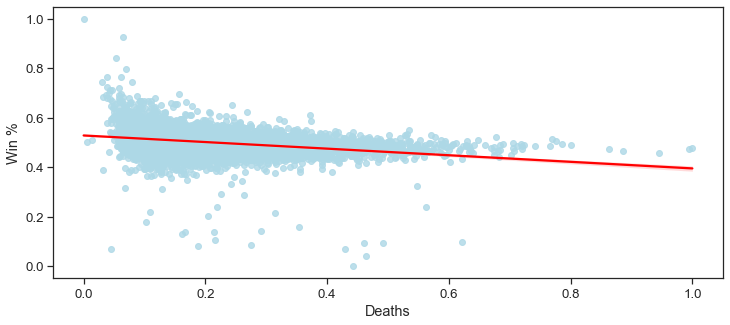

In [41]:
# Deaths
sns.set(font_scale=1.2)
sns.set_style('ticks')
sns.regplot( x = normalized_val_data['Deaths'],  y = normalized_val_data['Win %'], line_kws={"color": "red"}, scatter_kws={"color": "lightblue"})
sns.set(rc={'figure.figsize':(12,5)})

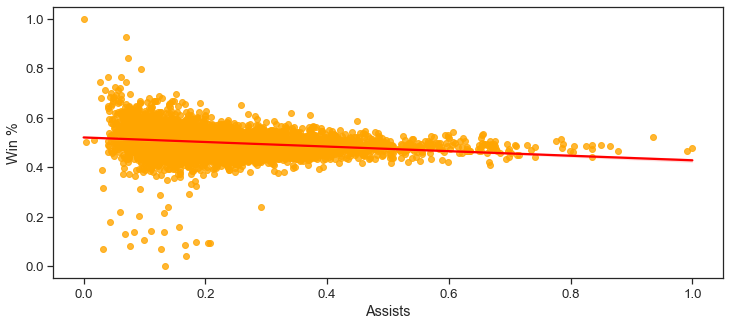

In [42]:
# Assist
sns.set(font_scale=1.2)
sns.set_style('ticks')
sns.regplot( x = normalized_val_data['Assists'],  y = normalized_val_data['Win %'], line_kws={"color": "red"}, scatter_kws={"color": "orange"})
sns.set(rc={'figure.figsize':(12,5)})

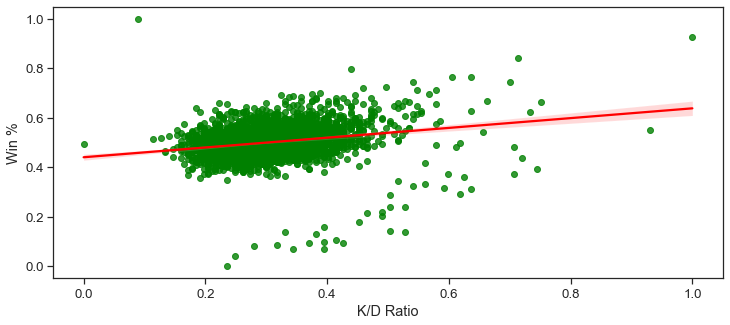

In [43]:
# KD
sns.set(font_scale=1.2)
sns.set_style('ticks')
sns.regplot( x = normalized_val_data['K/D Ratio'],  y = normalized_val_data['Win %'], line_kws={"color": "red"}, scatter_kws={"color": "green"})
sns.set(rc={'figure.figsize':(12,5)})

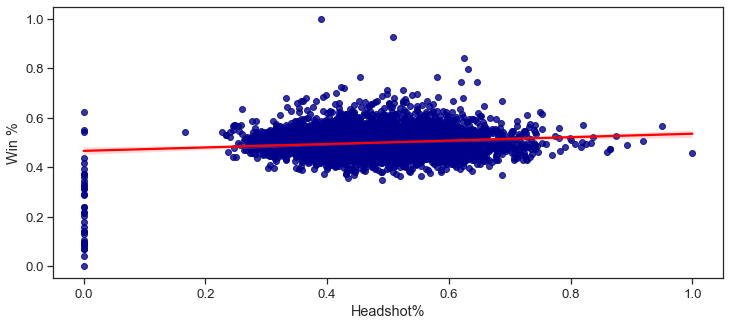

In [44]:
# Headshot %
sns.set(font_scale=1.2)
sns.set_style('ticks')
sns.regplot( x = normalized_val_data['Headshot%'],  y = normalized_val_data['Win %'], line_kws={"color": "red"}, scatter_kws={"color": "darkblue"})
sns.set(rc={'figure.figsize':(12,5)})

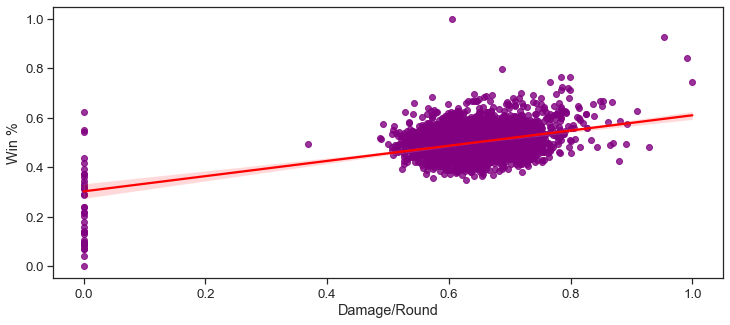

In [45]:
# Damage/round
sns.set(font_scale=1.2)
sns.set_style('ticks')
sns.regplot( x = normalized_val_data['Damage/Round'],  y = normalized_val_data['Win %'], line_kws={"color": "red"}, scatter_kws={"color": "purple"})
sns.set(rc={'figure.figsize':(12,5)})

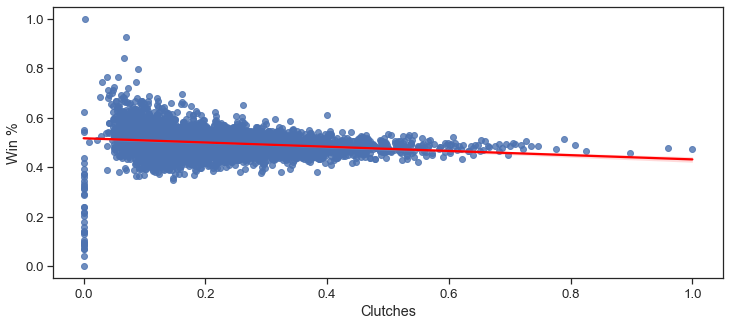

In [46]:
# Clutches
sns.set(font_scale=1.2)
sns.set_style('ticks')
sns.regplot( x = normalized_val_data['Clutches'],  y = normalized_val_data['Win %'], line_kws={"color": "red"})
sns.set(rc={'figure.figsize':(12,5)})

## Train/Test Split


In this section we will randomly split our dataframe into a training subset and a testing subset using a 70/30 division. 
We do so using the sklearn module which facilitates the process quite a lot.

In [47]:
# This is what we want to predict so we isolate it and make it our y-value
win_percentage = normalized_val_data.pop("Win %").values

In [48]:
# We will use sklearn
X_train, X_test, y_train, y_test = train_test_split(normalized_val_data, win_percentage, test_size = 0.3, train_size= 0.7)

In [49]:
# We have a training subset of 3844 inputs
X_train.shape

(3844, 16)

In [50]:
# We have a testing subset of 1648 inputs
X_test.shape

(1648, 16)

## Linear Regression Model

In this section we will build our linear regression model using sklearn. We will fit the model based on our data and then we will show the intercept and coefficients for each column in our normalized dataframe.

In [51]:
# Fit the linear regression model with our training data
linear_reg = LinearRegression().fit(X_train, y_train)

In [52]:
# Find interception and coefficients
list_coeff = list(zip(normalized_val_data.columns, linear_reg.coef_))
list_coeff.append(('Intercept', linear_reg.intercept_))
list_coeff 

[('Matches', -2.3691489254821163),
 ('Wins', 2.141257919662266),
 ('Kills', -0.4569479922266684),
 ('Headshots', -0.18049603425676986),
 ('Deaths', 1.247260693127891),
 ('Assists', -0.08015387038902),
 ('Score/Round', -0.1529362373478607),
 ('Kills/Round', -0.114369596936473),
 ('First Bloods', -0.09060444131551038),
 ('Aces', 0.004931409282801114),
 ('Clutches', -0.24906742512966007),
 ('Flawless', -0.10101432744581973),
 ('Most Kills (Match)', -0.055704122192197864),
 ('Damage/Round', -0.03575468860170493),
 ('K/D Ratio', 0.31723910444100833),
 ('Headshot%', 0.02030234698697059),
 ('Intercept', 0.45916256611712347)]

By definition, the intercept is the expected mean of our Y value when all X variables are equal to 0. 
A positive coefficient means that as our X independent variable increases the mean of the Y dependable variable also tends to increases.
A negative coefficient means that as our X independent variable increases the mean of the Y dependable variable also tends to decrease.


An increase in your K/D ratio and you headshot percentage would suggest that you would have a higher win percentage as their coefficients are positive, which is to be expected. However, it is kind of unexpected and interesting that individual kills and assist have a negative coefficients while deaths have a positive coefficient. In a way this makes sense because this game is not about getting more kills or died the fewest times, it is about who wins 13 rounds first in the match.

## Evaluate the model

In this section we will evaluate the model. First we will predict the win percentage using our model and the sklearn module predict.

In [53]:
# Use our model to predict win percentage
predict_win_percentage = linear_reg.predict(X_test)

In my previous study of machine learning and statistics I learned about four metrics that can help you evaluate your regression model and so I have used them here with the help of sklearn.metric to evaluate our Valorant model.

In [54]:
# Calculate R-Squared
print("R-Squared: ", r2_score(y_test, predict_win_percentage))

# Calculate Mean Absolute Error 
print("Mean Absolute Error : ", mean_absolute_error(y_test, predict_win_percentage))

# Calculate Mean Squared Error
print("Mean Squared Error : ", mean_squared_error(y_test, predict_win_percentage))

# Calculate Root Mean Squared Error
print("Root Mean Squared Error : ", np.sqrt(mean_squared_error(y_test, predict_win_percentage)))

R-Squared:  0.802738876723312
Mean Absolute Error :  0.016003543506936623
Mean Squared Error :  0.0006080318969252853
Root Mean Squared Error :  0.024658302798961758


We got an R-Squared of 80%, which is very good, as it means that 80% of the variation in the Win % variable can be explained by the X independent variables. In general this is considered a high value for R-squared and it means that our X varaibles have a strong effect in predicting the win percentage. 

Moreover, we get an mean absolute error of 1.6% which in general terms means that out of 100 players we will mispredict ~2 of them. This is a low absolute error and good news for the efficiency of our model.

Finally, we have small root and normal mean squared error which again shows that our model has meaning behind it and that our regression line is close to the true values of Win %.

#### NOTE

Keep in mind that if you rerun the code, since we split the data randomly into the testing and training subsets, then you might get different coefficients and different values for our evaluation metrics. However, I run the model over a for-loop and got the mean of all the values for R-Squared and we end up in the range from 78%-85%. THis is all good as it is higher that 70% which is the cut for a good value of R-Squared.

## Conclusion

In conclusion, I looked at over 5000 of the best players in Valorant and managed to model the data using a linear regression model which can predict the Win % of a given player ~80% of the time with a 1.6% absolute error given that players	Wins, Kills, Headshots, Deaths, Assists, Score/Round, Kills/Round, First Bloods, Aces, Clutches, Flawless, Most Kills (Match), Damage/Round, K/D Ratio, Headshot%.